In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import Counter

In [2]:
g = nx.read_edgelist('facebook_combined.txt')

In [3]:
# is the graph directed ?
g.is_directed()

False

## Basic Analysis

In [4]:
print("Number of nodes:", len(g))
print("Number of edges:", len(g.edges))

Number of nodes: 4039
Number of edges: 88234


In [5]:
# Diameter
diameter = nx.diameter(g)
print('Diameter', diameter)

Diameter 8


In [6]:
nx.average_shortest_path_length(g)

3.6925068496963913

## Centrality Analysis

(0.0006669573568730229, 0.011644899731955077)

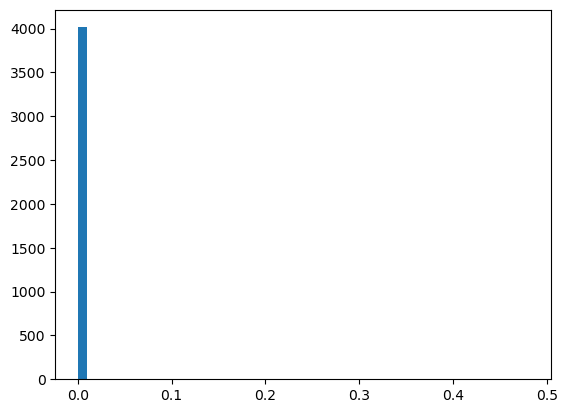

In [7]:
c = nx.centrality.betweenness_centrality(g)
plt.hist(c.values(), bins=50)
np.mean(list(c.values())), np.std(list(c.values()))

(0.010819963503439287, 0.01298021683194037)

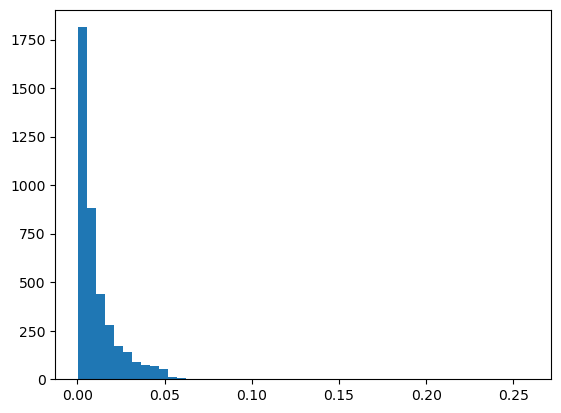

In [8]:
c = nx.centrality.degree_centrality(g)
plt.hist(c.values(), bins=50)
np.mean(list(c.values())), np.std(list(c.values()))

(0.2761677635668376, 0.036119603843235835)

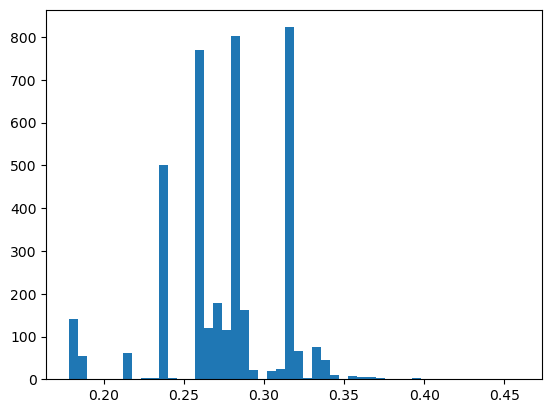

In [9]:
c = nx.centrality.closeness_centrality(g)
plt.hist(c.values(), bins=50)
np.mean(list(c.values())), np.std(list(c.values()))

## Clustering  coefficient analysis

In [10]:
nx.cluster.average_clustering(g)

0.6055467186200876

(0.6055467186200862, 0.21443563698634002)

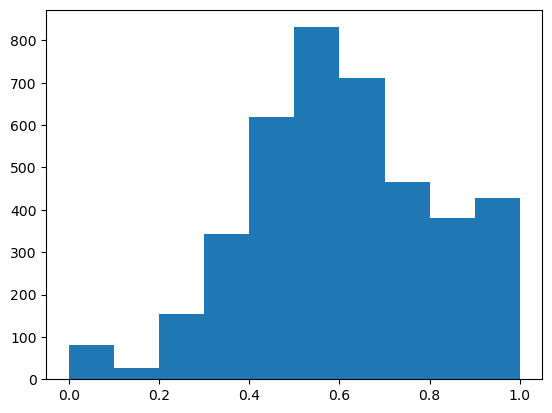

In [11]:
c = nx.cluster.clustering(g)
plt.hist(c.values())
np.mean(list(c.values())), np.std(list(c.values()))

## Small World Network and Heavy Tail Analysis

$ L \approx log(N) $

In [12]:
randomg = nx.algorithms.smallworld.random_reference(g, connectivity=False)

In [13]:
l = nx.average_shortest_path_length(g)
N = np.log(len(g))/np.log(10)
l, N

(3.6925068496963913, 3.606273853169988)

In [14]:
print(nx.average_clustering(g), ">>", nx.average_clustering(randomg))

0.6055467186200876 >> 0.0641042150264863


## Log log plot

Many different aspects of the graph can be plotted to show a powerlaw relation but this is the one we learned.  The student may make an argument in either direction, but it's important they back up that argument.  This graph is roughly linear for most of it's length though.

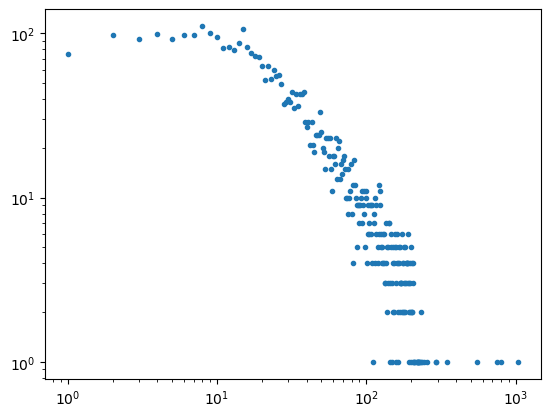

In [15]:
d = nx.degree_histogram(g)
plt.loglog(d, '.')

## Comparison to ER (Random) graph

\begin{eqnarray} 
\frac{N * (N-1)}{2} * p &=& E \\
p &=& \frac{E * 2}{N * (N-1)}
\end{eqnarray}

In [16]:
N = len(g)
E = len(g.edges)
p = E * 2. / (N*(N-1))
print(p)
rg = nx.generators.random_graphs.erdos_renyi_graph(N, p)


0.010819963503439287


At a minimum student needs to compare

In [17]:
print(len(g), len(rg))
print(len(rg.edges), "~", len(g.edges))

4039 4039
88124 ~ 88234


In [18]:
nx.diameter(g), nx.diameter(rg)

(8, 4)

In [19]:
nx.average_shortest_path_length(g), nx.average_shortest_path_length(rg)

(3.6925068496963913, 2.6066634121181775)

In [20]:
nx.average_clustering(g), nx.average_clustering(rg)

(0.6055467186200876, 0.01078268771464244)

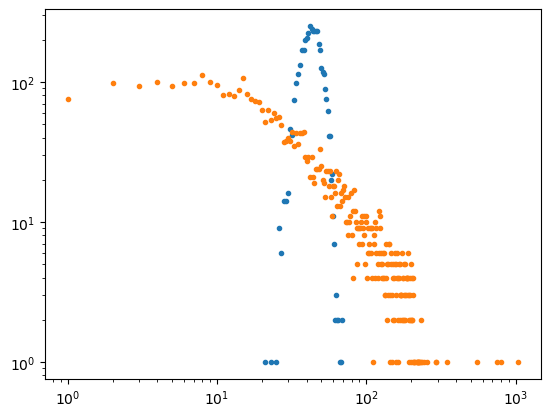

In [21]:
#optional 
d = nx.degree_histogram(rg)
plt.loglog(d, '.')
d = nx.degree_histogram(g)
plt.loglog(d, '.')

# (or) Compare to Watts Strogatz

In [22]:
np.mean([x[1] for x in list(g.degree)])

43.69101262688784

In [30]:
nx.average_shortest_path_length(g)

3.6925068496963913

In [36]:
#e = nk/2
#k = e*2/n
k = int(np.round(len(g.edges) * 2 / len(g.nodes)))
print(k)

# found experimentally to give a rough approx of the same 
# avg shortest_path_length
p = 0.019

for i in range(3):
    rg = nx.random_graphs.watts_strogatz_graph(len(g), k, p)
    print(nx.average_shortest_path_length(rg))

44
3.6651227794972274
3.6604451324695657
3.7242301135008455


In [38]:
print(len(g), len(rg))
print(len(rg.edges), "~", len(g.edges))

4039 4039
88858 ~ 88234


In [39]:
nx.diameter(g), nx.diameter(rg)

(8, 6)

In [40]:
nx.average_clustering(g), nx.average_clustering(rg)

(0.6055467186200876, 0.6936999862846891)

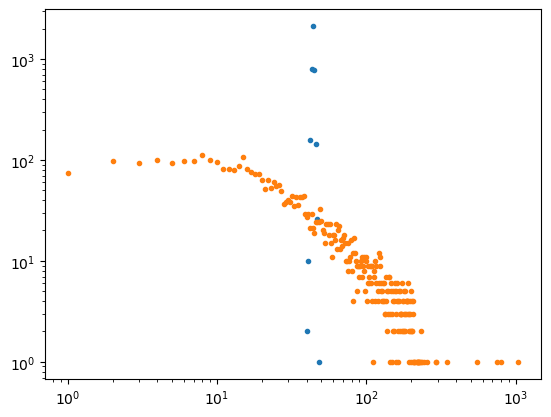

In [41]:
#optional 
d = nx.degree_histogram(rg)
plt.loglog(d, '.')
d = nx.degree_histogram(g)
plt.loglog(d, '.')

Student may also compare to Barabasi-Albert random graph... exercise left to the reader